In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('balloon_trajectory.csv',names=['time','x','y','z'])

In [117]:
def get_data_in_timewindow(data, t_start, t_end):
    data_in_timewindow = data.loc[  (data.time >= t_start) 
                                  & (data.time < t_end)
                                  & (data.index%1 == 0)
                                 ]
    return data_in_timewindow

Text(0.5,1,'Initial parameter guess')

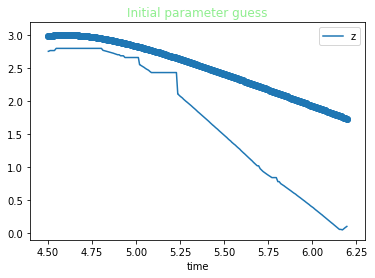

In [189]:
data_in_t = get_data_in_timewindow(data,4.5,6.2)
data_in_t.plot("time","z")
p0=(1,3,4.6,3)
plt.scatter(data_in_t.time, position_function(data_in_t.time, *p0))
plt.title('Initial parameter guess',color='lightgreen')

In [181]:
def position_function(t,*params):
    v_max, kappa, t0, z0 = params

    return z0 + v_max*(t0+1/kappa) - v_max*t - v_max/kappa * np.exp(-kappa*(t-t0))

def velocity_function(t,*params):
    v_max, kappa, t0, z0 = params
    return v_max*(1-np.exp(-kappa*(t-t0)))

In [182]:
from scipy.optimize import curve_fit
p_opt, _ = curve_fit(position_function, data_in_t.time, data_in_t.z, p0=(3,2,4.6,3))
print(f'v_max={p_opt[0]:.2f} - kappa={p_opt[1]:.2f} - t0={p_opt[2]:.2f} - z0={p_opt[3]:.2f}')

v_max=2.38 - kappa=3.81 - t0=4.69 - z0=2.86


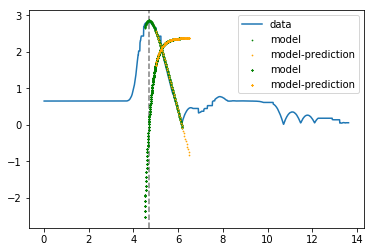

In [183]:
t_model = data_in_t.time
z_model = position_function(t_model, *p_opt)
v_model = velocity_function(t_model, *p_opt)

t_pred = np.linspace(5,6.5)
z_pred = position_function(t_pred, *p_opt)
v_pred = velocity_function(t_pred, *p_opt)

plt.plot(data['time'],data['z'],label='data')
plt.scatter(t_model, z_model,color='green',marker='.',s=2,zorder=3,label='model')
plt.scatter(t_pred, z_pred,color='orange',marker='.',s=2,zorder=3,label='model-prediction')

plt.scatter(t_model, v_model,color='green',marker='x',s=2,zorder=3,label='model')
plt.scatter(t_pred, v_pred,color='orange',marker='x',s=2,zorder=3,label='model-prediction')

plt.axvline(p_opt[2],linestyle='--',color='grey')
plt.legend()

In [171]:
def plot_model_prediction(t_start, t_stop, t_pred, ax):
    data_in_t = get_data_in_timewindow(data,t_start,t_stop)
    p_opt, _ = curve_fit(position_function, data_in_t.time, data_in_t.z, p0=(3,2,4.6,3))

    t_model = data_in_t.time
    z_model = position_function(t_model, *p_opt)

    t_pred = np.linspace(t_stop,t_stop+t_pred)
    z_pred = position_function(t_pred, *p_opt)
    
    ax.plot(data['time'],data['z'],label='data')
    ax.scatter(t_model, z_model,color='green',marker='.',s=2,zorder=3,label='model')
    ax.scatter(t_pred, z_pred,color='orange',marker='.',s=2,zorder=3,label='model-prediction')
    ax.axvline(p_opt[2],linestyle='--',color='grey')
    #ax.legend()
    #plt.show()

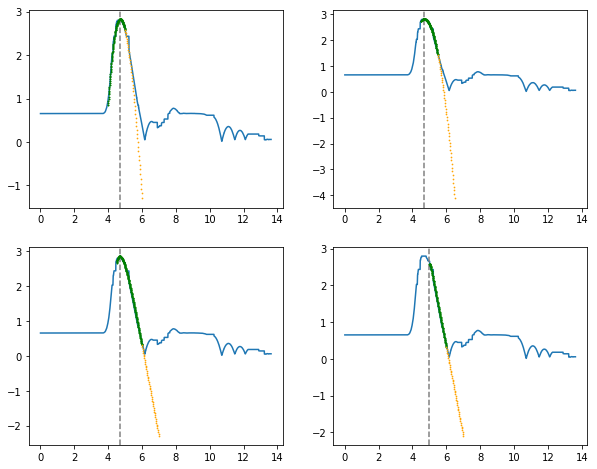

In [168]:
plt.figure(figsize=(10,8))
plot_model_prediction(4,5,1,plt.subplot(2,2,1))
plot_model_prediction(4.5,5.5,1,plt.subplot(2,2,2))
plot_model_prediction(4.5,6.,1,plt.subplot(2,2,3))
plot_model_prediction(5,6,1,plt.subplot(2,2,4))

In [237]:
df = pd.DataFrame(columns=['time','x','y','z'])
df = df.append(pd.DataFrame(np.matrix([1,2,3,4]),columns=['time','x','y','z']),ignore_index=True)
df = df.append(pd.DataFrame(np.matrix([1,2,3,4]),columns=['time','x','y','z']),ignore_index=True)
df = df.append(pd.DataFrame(3*np.matrix([1,2,3,4]),columns=['time','x','y','z']),ignore_index=True)

In [245]:
df.iloc[-1][1:]

x     6
y     9
z    12
Name: 2, dtype: object